In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('../../DATA/kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


First reading off some statistical data like percentile, mean and std of the numerical labels (features).

In [3]:
# housing.info()
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Check for any null/ nan values

In [4]:
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Getting an estimate of unique entries in each feature
for feature in housing.columns:
    print(feature)
    print(housing[feature].unique())
    print('\n')

id
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


date
['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014'
 '7/7/2014' '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014'
 '4/28/2015' '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015'
 '3/3/2015' '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014'
 '8/28/2014' '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014'
 '8/25/2014' '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014'
 '3/16/2015' '11/5/2014' '4/20/2015' '6/9/2014' '3/23/2015' '12/2/2014'
 '12/22/2014' '1/28/2015' '6/2/2014' '11/14/2

In [8]:
housing['grade']

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

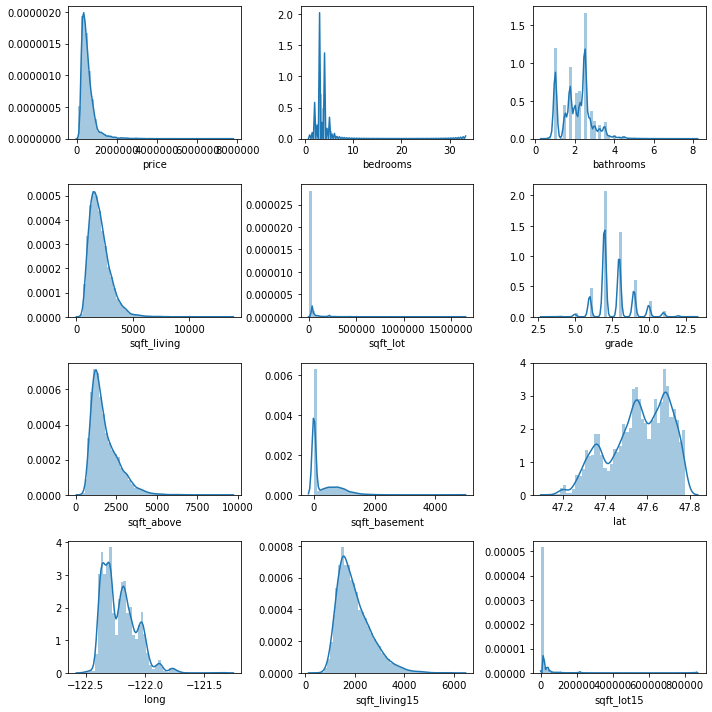

In [9]:
# Getting a look at distributions of numeric features

features = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'grade',
            'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

fig, axs = plt.subplots(4, 3, figsize=(10, 10))
index = 0
axs = axs.flatten()
for k,v in housing[features].items():
    sns.distplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout()

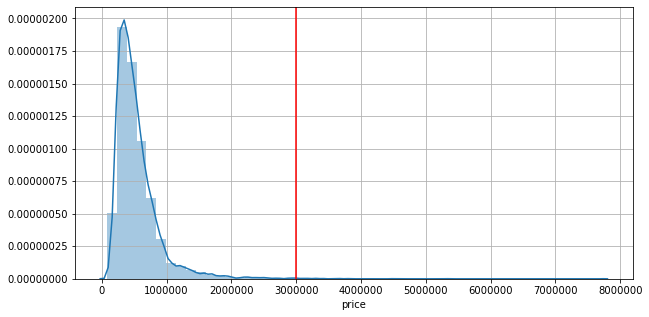

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(housing['price'])
plt.axvline(x=3e6, color='r')
plt.grid()

* Roughly, one can draw a vertical line to indicates a boundary beyond which the points are considered to be an outlier. Later on we might remove these 10% top expensive houses for our analysis.

In [11]:
def add_grade_string(x):
    if x in [1, 2, 3]:
        return 'Poor'
    elif x in [4, 5, 6, 7]:
        return 'Average'
    elif x in [8, 9, 10]:
        return 'Good'
    else:
        return 'Best'

housing['grade'] = housing['grade'].apply(add_grade_string)
housing['grade'] = housing['grade'].astype('category')
housing['grade'] = housing['grade'].cat.codes
housing.loc[:, ['grade']].head()

,grade
0,0
1,0
2,0
3,0
4,2


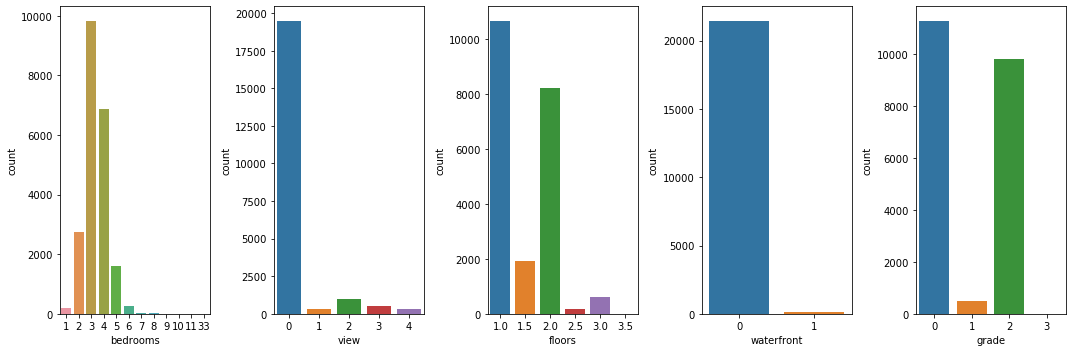

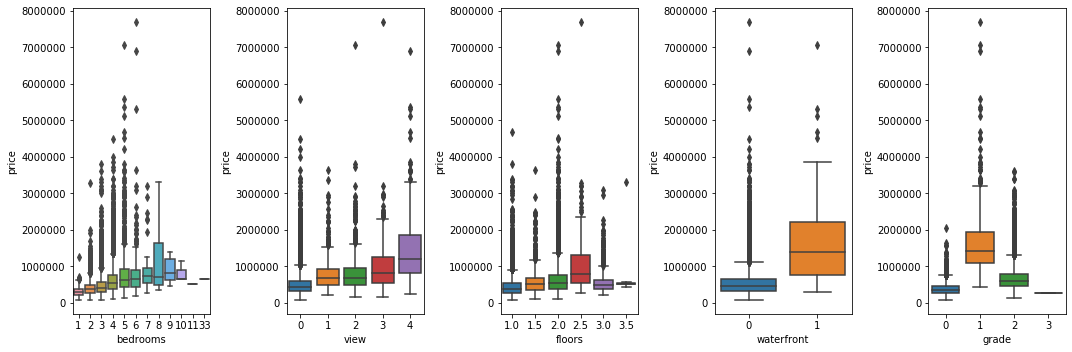

In [12]:
# Distribution of some categorical values
cat_features = ['bedrooms', 'view', 'floors', 'waterfront', 'grade']
fig, axs = plt.subplots(1,5,figsize=(15,5))
axs = axs.flatten()
for i, feature in enumerate(cat_features):
    sns.countplot(housing[feature], ax=axs[i]);
plt.tight_layout()

fig, axs = plt.subplots(1,5,figsize=(15,5))
axs = axs.flatten()
for i, feature in enumerate(cat_features):
    sns.boxplot(x=feature,y='price',data=housing, ax=axs[i])
plt.tight_layout()

* From above one can infer that a majority of houses have bedrooms between 3 and 7.
* The housing prices strongly depend on whether the house is on waterfront or otherwise, i.e., if the house is on the waterfront then it is more likely to be expensive.

* Further, considering the geographical features, namely, 'lat' and 'long', it appears as if there is a hotspot where more houses are crowded which is around the location with the below Lattitude and Longitude.

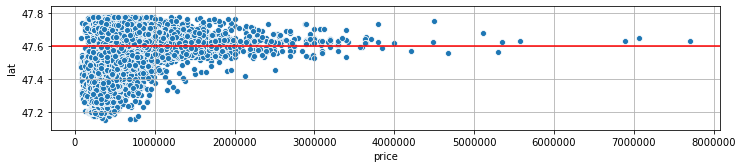

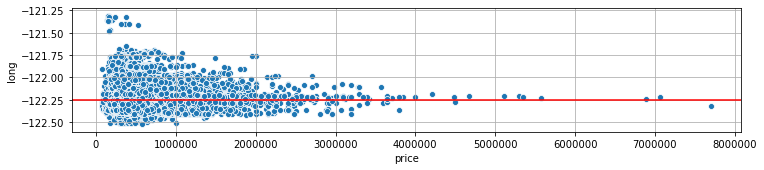

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
sns.scatterplot(x='price',y='lat',data=housing)
plt.axhline(y=47.6, color='r', linestyle='-')
plt.grid()
plt.figure(figsize=(12,5))
plt.subplot(2,1,2)
sns.scatterplot(x='price',y='long',data=housing)
plt.axhline(y=-122.25, color='r', linestyle='-')
plt.grid()

* Clearly, -122.25 longiture and 47.6 lattitude looks like an expensive housing area 

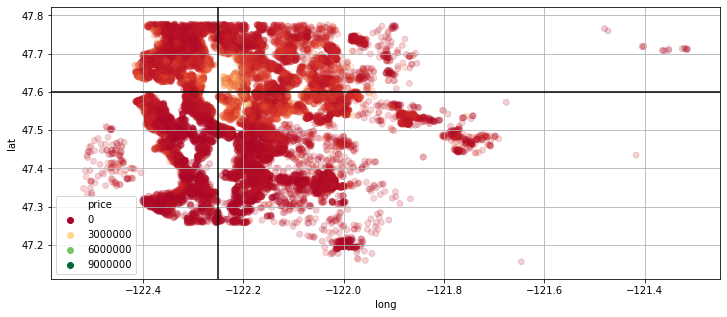

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='long',y='lat',data=housing, hue='price', palette='RdYlGn',edgecolor=None,alpha=0.2)
plt.axhline(y=47.6, color='k', linestyle='-')
plt.axvline(x=-122.25, color='k', linestyle='-')
plt.grid()

* We now remove the very expensive houses which are the outliers and plot the result again. Particularly, we remove the top 10% of the prices which were alluded earlier.

Length of the dataset: 21597
no. of Top 1% of data points: 2159.7000000000003


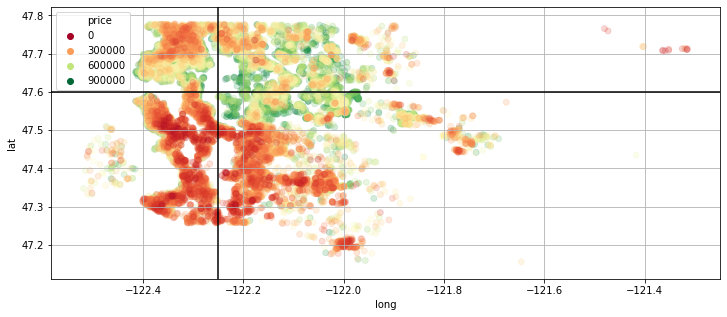

In [15]:
print('Length of the dataset: {}\nno. of Top 1% of data points: {}'
      .format(len(housing),(len(housing)*0.10)))

new_housing = housing.sort_values(by='price', ascending=False).iloc[2160:]

plt.figure(figsize=(12,5))
sns.scatterplot(x='long',y='lat',data=new_housing, hue='price', palette='RdYlGn',edgecolor=None,alpha=0.2)
plt.axhline(y=47.6, color='k', linestyle='-')
plt.axvline(x=-122.25, color='k', linestyle='-')
plt.grid()